# 理解循环神经网络
### Step 1：准备IMDB数据

In [3]:
from keras.datasets import imdb
from keras_preprocessing import sequence

max_features = 10000 
maxlen = 500 
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


### Step 2：构建模型并训练

In [4]:
from keras.layers import Embedding, SimpleRNN, Dense

model = Sequential() 
model.add(Embedding(max_features, 32)) 
model.add(SimpleRNN(32)) 
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10, 
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 19s 105ms/step - loss: 0.5704 - acc: 0.7005 - val_loss: 0.4120 - val_acc: 0.8288
Epoch 2/10
157/157 [==============================] - 16s 100ms/step - loss: 0.3930 - acc: 0.8381 - val_loss: 0.7611 - val_acc: 0.6914
Epoch 3/10
157/157 [==============================] - 18s 118ms/step - loss: 0.2697 - acc: 0.8955 - val_loss: 0.3632 - val_acc: 0.8454
Epoch 4/10
157/157 [==============================] - 15s 94ms/step - loss: 0.2199 - acc: 0.9147 - val_loss: 0.4479 - val_acc: 0.7876
Epoch 5/10
157/157 [==============================] - 15s 95ms/step - loss: 0.1684 - acc: 0.9384 - val_loss: 0.3593 - val_acc: 0.8630
Epoch 6/10
157/157 [==============================] - 15s 96ms/step - loss: 0.1221 - acc: 0.9571 - val_loss: 0.4026 - val_acc: 0.8580
Epoch 7/10
157/157 [==============================] - 15s 93ms/step - loss: 0.0872 - acc: 0.9718 - val_loss: 0.4704 - val_acc: 0.8228
Epoch 8/10
157/157 [==============================] - 15s 9

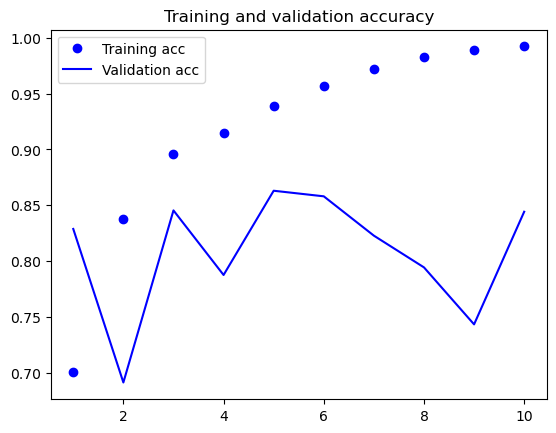

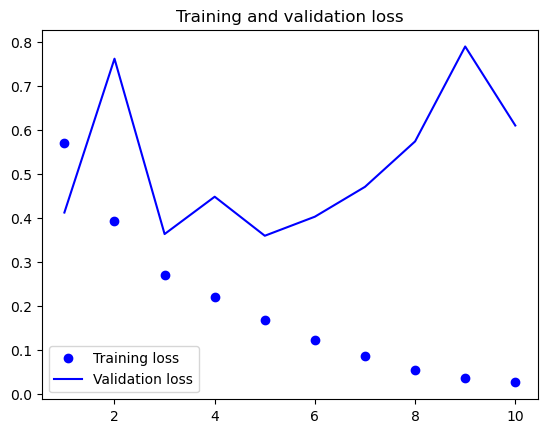

In [5]:
# 绘制结果
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [6]:
model.evaluate(input_test, y_test)

782/782 [==============================] - 13s 16ms/step - loss: 0.6211 - acc: 0.8438


[0.6210909485816956, 0.8437600135803223]

### Step 3：LSTM

In [7]:
from keras.layers import LSTM
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
              epochs=10,
              batch_size=128,
              validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 35s 208ms/step - loss: 0.5335 - acc: 0.7451 - val_loss: 0.3664 - val_acc: 0.8458
Epoch 2/10
157/157 [==============================] - 31s 197ms/step - loss: 0.3070 - acc: 0.8778 - val_loss: 0.5397 - val_acc: 0.8030
Epoch 3/10
157/157 [==============================] - 30s 189ms/step - loss: 0.2391 - acc: 0.9118 - val_loss: 0.2851 - val_acc: 0.8916
Epoch 4/10
157/157 [==============================] - 30s 193ms/step - loss: 0.2069 - acc: 0.9233 - val_loss: 0.3162 - val_acc: 0.8748
Epoch 5/10
157/157 [==============================] - 30s 193ms/step - loss: 0.1798 - acc: 0.9365 - val_loss: 0.3377 - val_acc: 0.8506
Epoch 6/10
157/157 [==============================] - 30s 193ms/step - loss: 0.1608 - acc: 0.9430 - val_loss: 0.3737 - val_acc: 0.8804
Epoch 7/10
157/157 [==============================] - 30s 193ms/step - loss: 0.1473 - acc: 0.9485 - val_loss: 0.3603 - val_acc: 0.8836
Epoch 8/10
157/157 [==============================] - 3

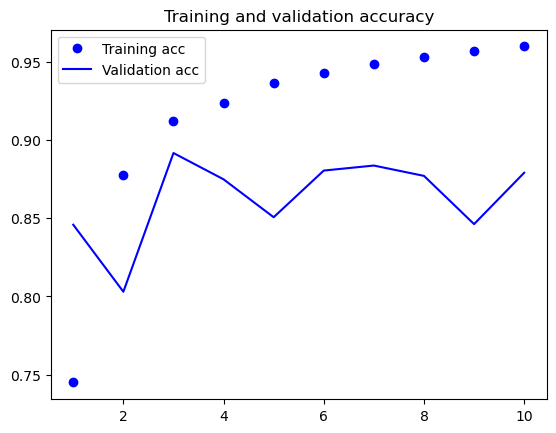

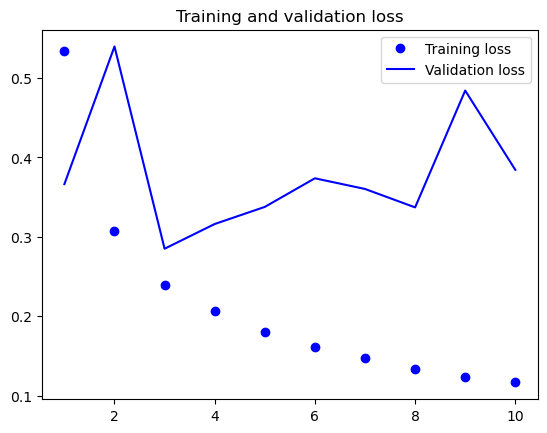

In [8]:
# 绘制结果
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [9]:
model.evaluate(input_test, y_test)

782/782 [==============================] - 28s 36ms/step - loss: 0.4229 - acc: 0.8650


[0.4229196608066559, 0.8649600148200989]

In [13]:
model.predict(input_test)

782/782 [==============================] - 28s 35ms/step


array([[0.03442571],
       [0.99761355],
       [0.99030715],
       ...,
       [0.02721924],
       [0.01987122],
       [0.278235  ]], dtype=float32)